# Лабораторная работа №4

## Импортируем библиотеки

In [7]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from funcs import prepare_data, plot_scores_compare, ClfTree, RegTree

### Загрузим данные

In [8]:
lab2_sample_len = 20000
lab2_df = pd.read_csv("Data/train2.csv")
lab2_df = lab2_df.sample(n=lab2_sample_len, replace=False, random_state=42)

lab3_df = pd.read_csv("Data/train3.csv")

### Подготовим данные

In [9]:
x2, y2, x3, y3 = prepare_data(lab2_df, lab3_df)

## Классификация

Сохранение дерева классификации: Успешно
Лучшие параметры:


criterion            log_loss
max_depth                   7
min_samples_leaf            1
min_samples_split           2
dtype: object

score: 0.9029598488954684


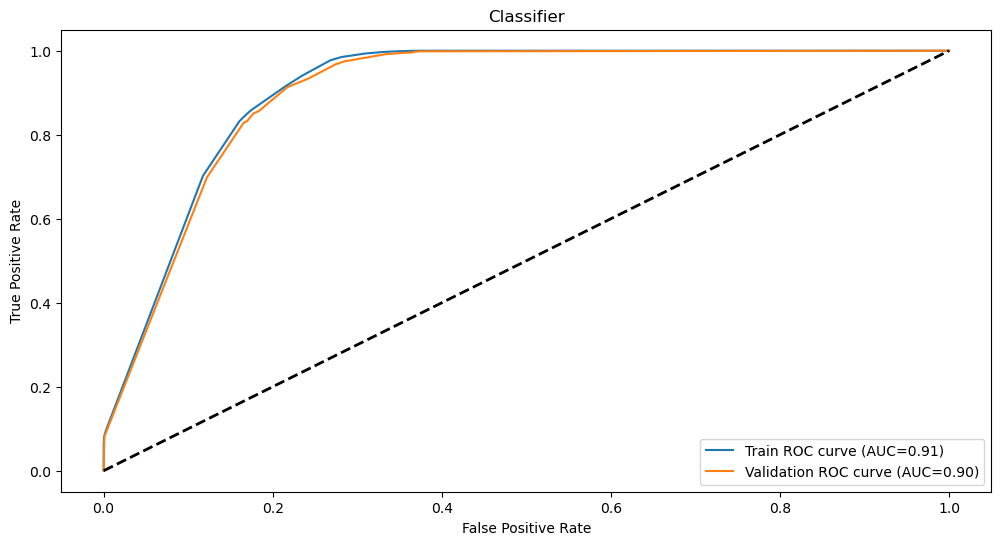

In [10]:
clf_tree = ClfTree(DecisionTreeClassifier, x2, y2,
                   {
                       'max_depth': [3, 5, 7],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4],
                       'criterion': ['gini', 'entropy', 'log_loss'],
                   },
                   {
                       'max_depth': [None] + list(range(1, 15)),
                       'max_leaf_nodes': [None] + list(range(2, 15)),
                       'min_samples_split': list(range(2, 15)),
                       'min_samples_leaf': list(range(1, 15)),
                   })

# clf_tree = ClfTree(DecisionTreeClassifier, x2, y2,
#                    {'criterion': 'entropy',
#                     'max_depth': 7,
#                     'min_samples_leaf': 1,
#                     'min_samples_split': 2},
#                    {
#                        'max_depth': [None] + list(range(1, 15)),
#                        'max_leaf_nodes': [None] + list(range(2, 15)),
#                        'min_samples_split': list(range(2, 15)),
#                        'min_samples_leaf': list(range(1, 15)),
#                    })

print(clf_tree.export_to_pdf())
print("Лучшие параметры:")
display(pd.Series(clf_tree.best_params))
print("score:", clf_tree.score)
clf_tree.plot_roc_auc()

### Сравним метрики для разных параметров модели

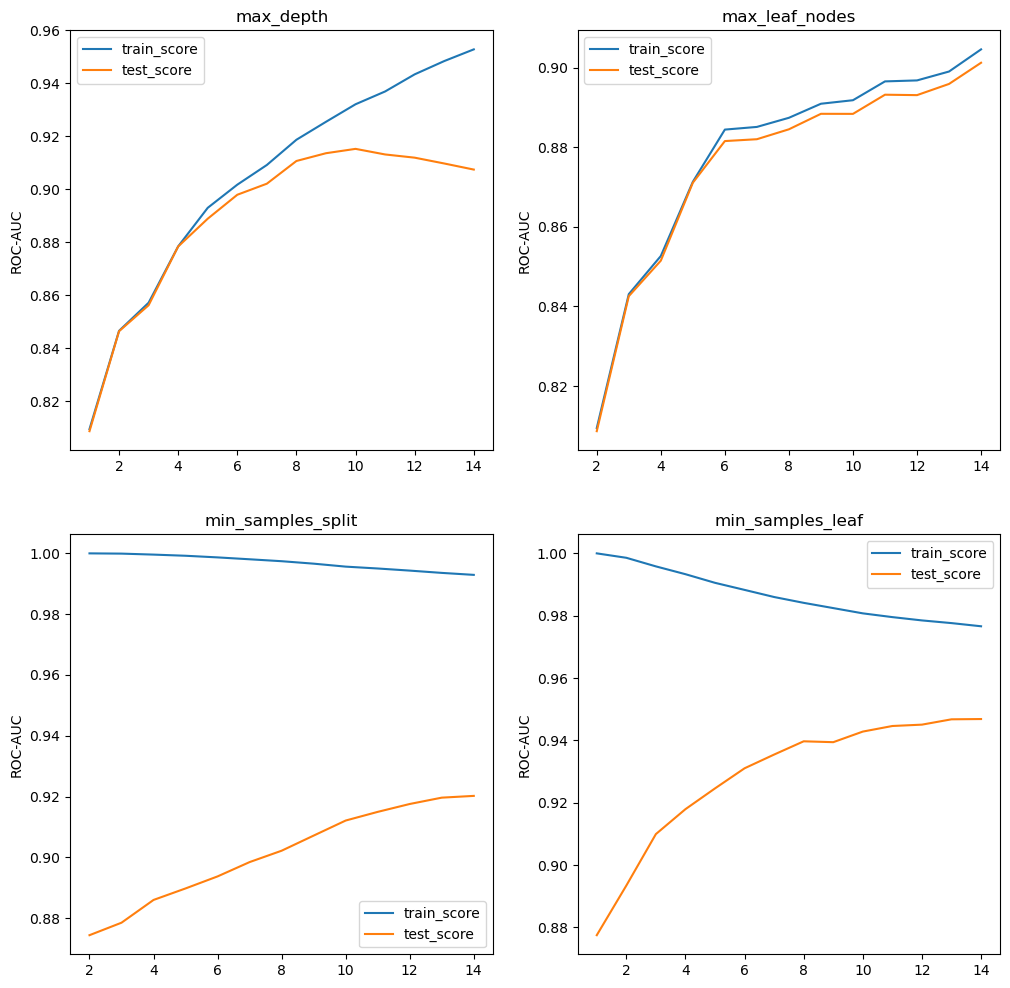

In [11]:
clf_tree.params_compare()

### Исследуем зависимость результата от кол-ва листьев (и глубины дерева)

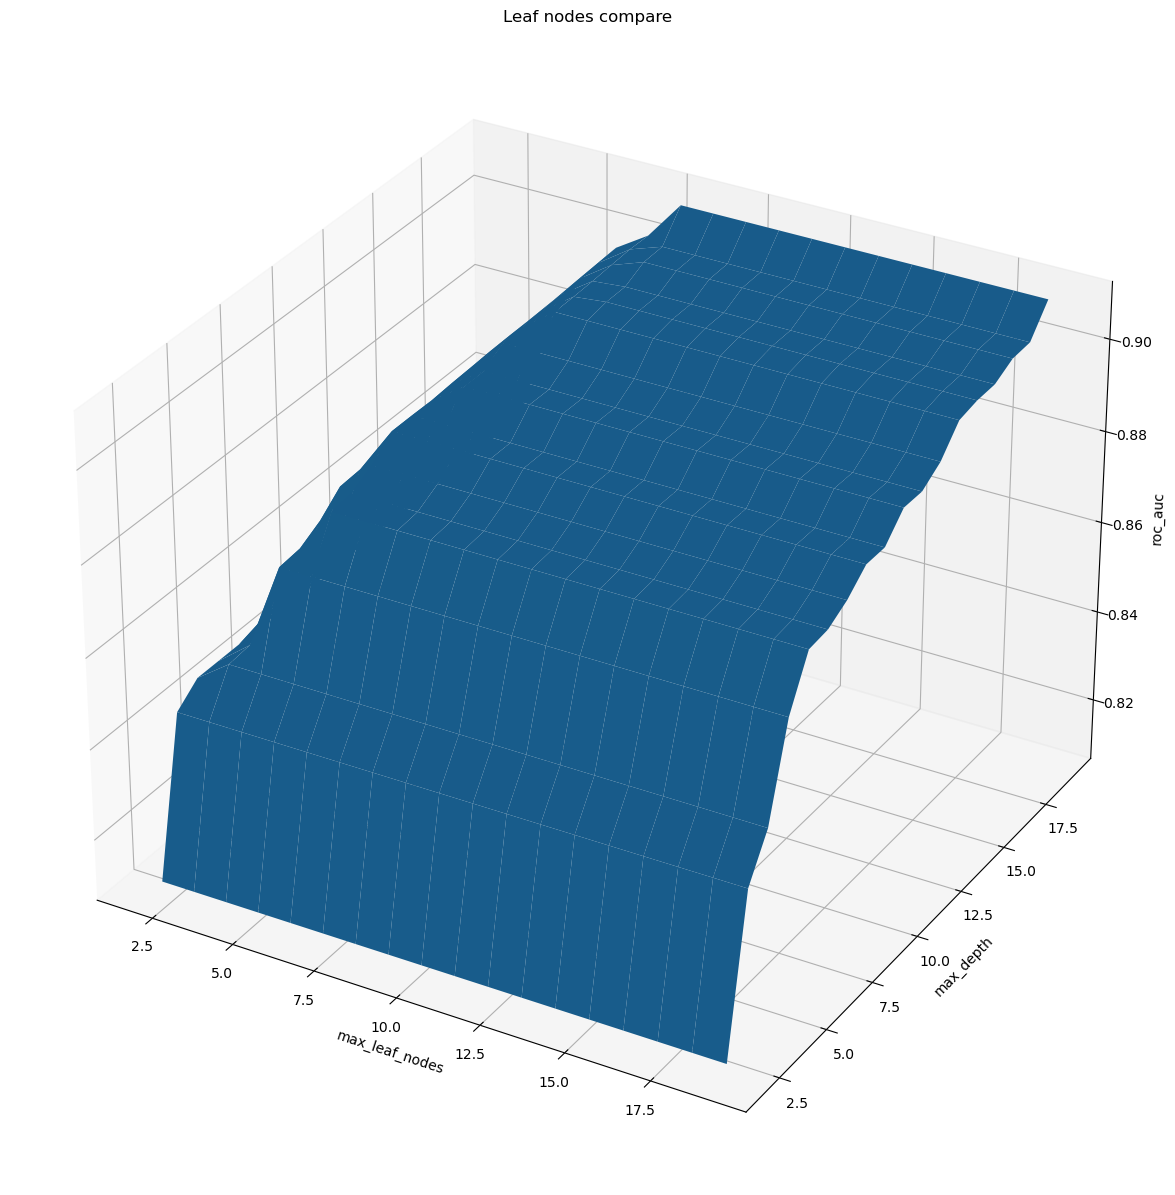

In [12]:
clf_tree.max_leaf_compare()

## Регрессия

In [13]:
reg_tree = RegTree(DecisionTreeRegressor, x3, y3,
                   {
                       'max_depth': [3, 5, 7],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4],
                       'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                   },
                   {
                       'max_depth': [None] + list(range(1, 20)),
                       'max_leaf_nodes': [None] + list(range(2, 20)),
                       'min_samples_split': list(range(2, 20)),
                       'min_samples_leaf': list(range(1, 20)),
                   })

reg_tree.export_to_pdf()
print("Лучшие параметры:\n", pd.Series(reg_tree.best_params))
print("Оценки модели:")
display(reg_tree.get_scores())

Лучшие параметры:
 criterion            squared_error
max_depth                        3
min_samples_leaf                 1
min_samples_split                2
dtype: object
Оценки модели:


R^2             0.865034
Adj R^2         0.861013
RMSE       409227.626531
AIC          6983.709164
BIC          7008.160594
dtype: float64

### Сравним метрики для разных параметров модели

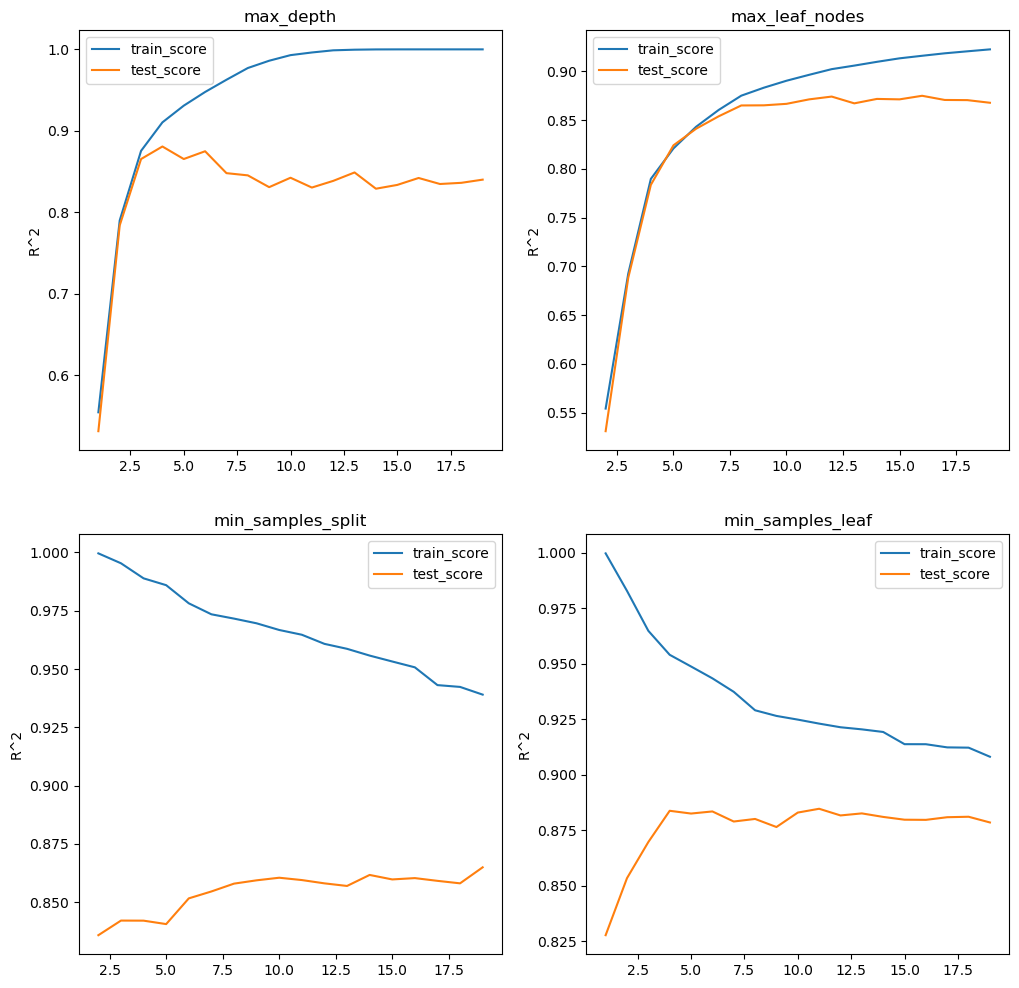

In [14]:
reg_tree.params_compare()

### Исследуем зависимость результата от кол-ва листьев (и глубины дерева)

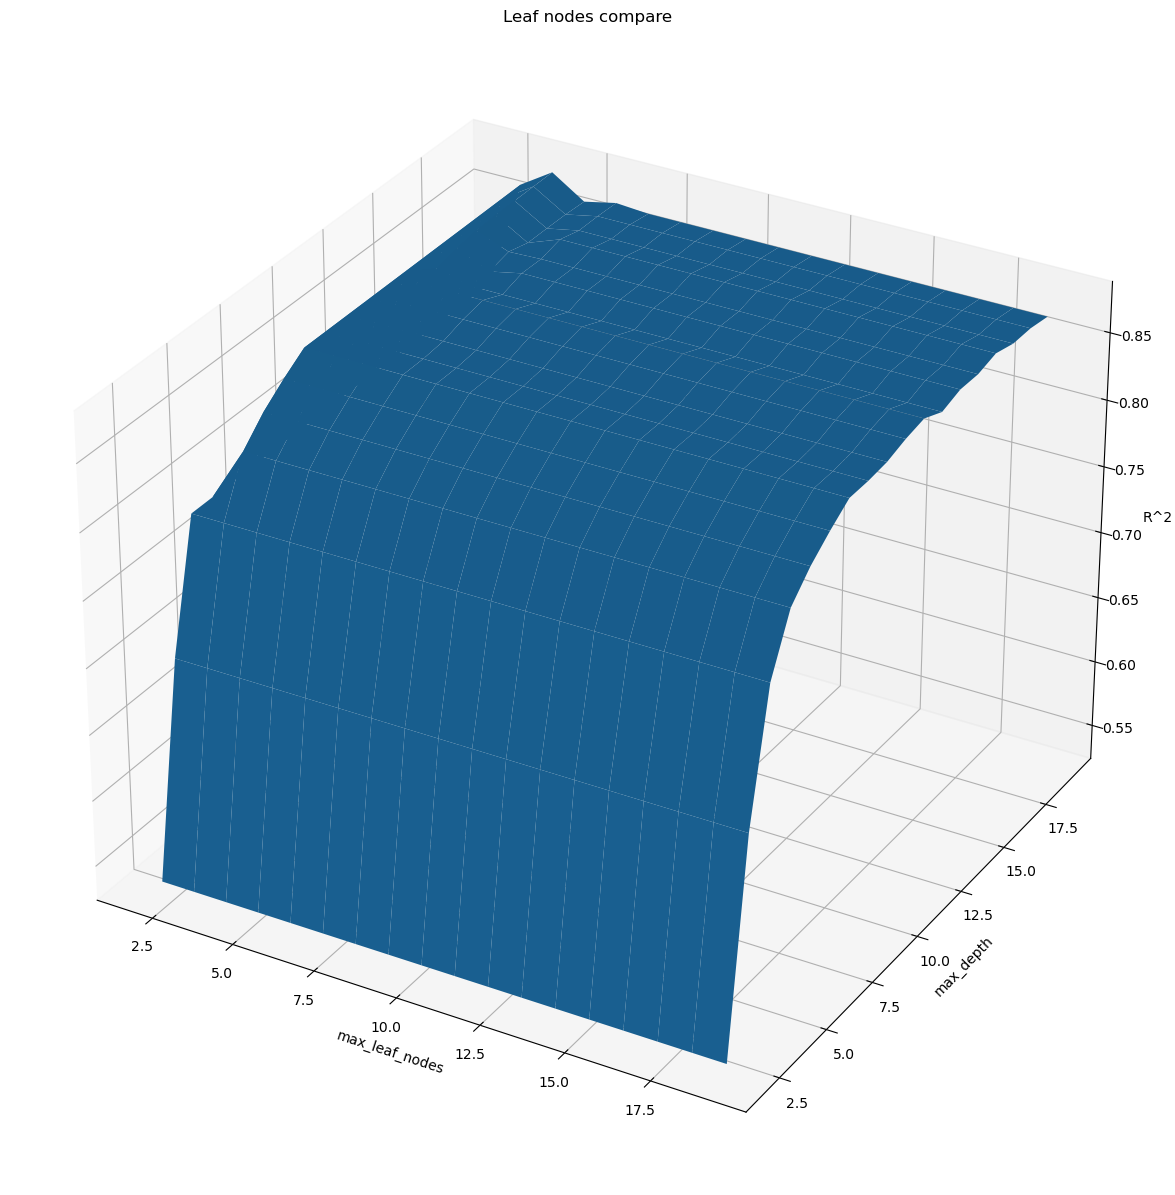

In [15]:
reg_tree.max_leaf_compare()

### Сравним оценку деревьев с показателями других моделей

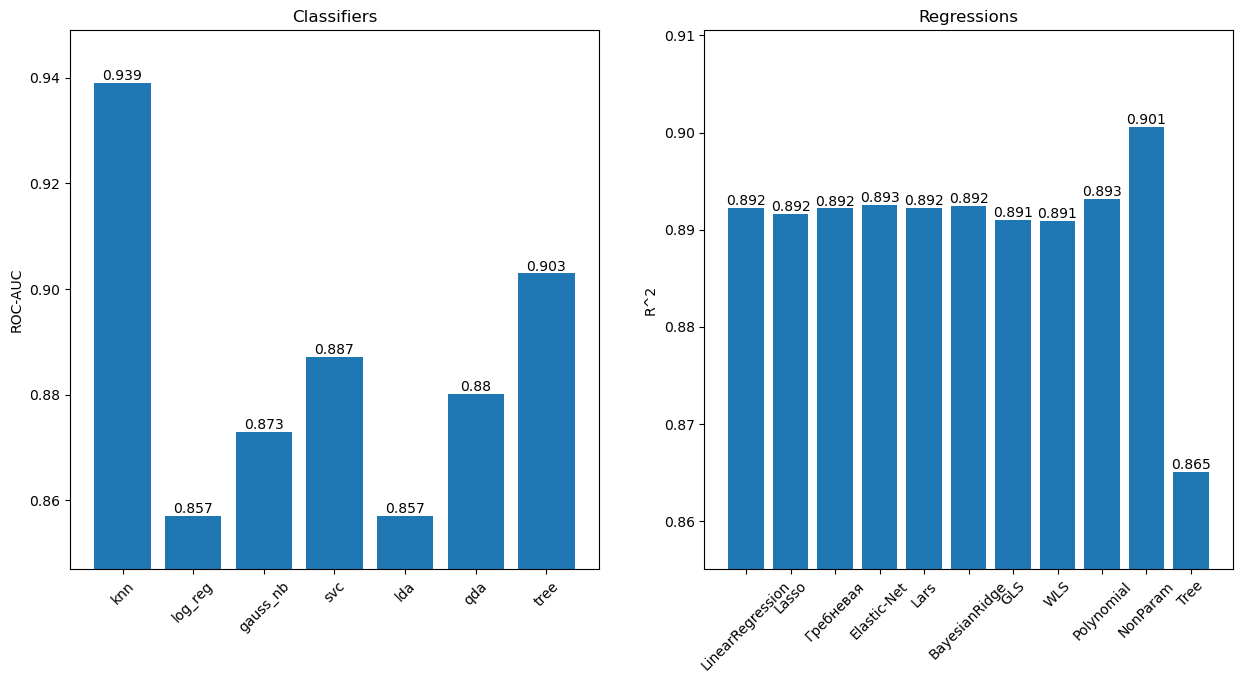

In [16]:
clf_scores = pd.read_csv("Data/scores2.csv", sep=",").append({"Model name": "tree", "ROC-AUC": clf_tree.score}, ignore_index=True)
reg_scores = pd.read_csv("Data/scores3.csv", sep=",").append({"Model name": "Tree", "R^2": reg_tree.score}, ignore_index=True)
plot_scores_compare(clf_scores, reg_scores)

In [17]:
clf_scores.to_csv("scores_clf.csv")
reg_scores.to_csv("scores_reg.csv")